# Tugas Analisis Data dengan Python

#### Nama                  : Lukman Fadlansyah R.
#### NIM                      : 15118074
#### Asal Universitas: ITB
#### Tanggal mulai pengerjaan tugas: 14 November 2020
#### Sumber dataset :https://www.kaggle.com/defrinogionaldo/indonesias-human-development-index-20102014 dan https://www.kaggle.com/mathurinache/list-of-indonesian-provinces-by-grp-per-capita

## Import Library
Pada bagian ini, libraries yang dibutuhkan akan diimport

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

## Data Observation
Data csv yang dibutuhkan, yaitu data IPM menurut provinsi di Indonesia 2010-2014 dan Gross Regional Product (GRP) 2019 diimport ke dalam notebook

In [25]:
IPM = pd.read_csv('C:/Users/Lenovo/IPM-Menurut-Provinsi-di-Indonesia-2010-2014.csv',delimiter=';')

In [26]:
IPM.head(20)

,tahun,provinsi,indeks
0,2010,Aceh,67.09
1,2010,Sumatera Utara,67.09
2,2010,Sumatera Barat,67.25
3,2010,Riau,68.65
4,2010,Kepulauan Riau,65.39
5,2010,Jambi,64.44
6,2010,Sumatera Selatan,65.35
7,2010,Kepulauan Bangka Belitung,63.71
8,2010,Bengkulu,66.02
9,2010,Lampung,71.13


In [27]:
GRP = pd.read_csv('C:/Users/Lenovo/List_of_Indonesianprovinces_by_GRP_per_capita.csv',delimiter=';')

In [28]:
GRP.head(20)

,Rank,Province,Region,"GDP(in billion Rp, GDP Nominal)",GDP PPP (in billion $ ),Comparable country
0,1,DKI Jakarta,Java,2840828,200.91,New Zealand
1,2,Jawa Timur,Java,2352425,166.37,Kazakhstan
2,3,Jawa Barat,Java,2125158,150.30,Ukraine
3,4,Jawa Tengah,Java,1362457,96.35,Kenya
4,5,Sumatera Utara,Sumatra,801733,56.70,Lebanon
5,6,Riau,Sumatra,765198,54.12,Slovenia
6,7,Banten,Java,664963,47.03,Azerbaijan
7,8,Kalimantan Timur,Kalimantan,653677,46.23,Turkmenistan
8,9,Sulawesi Selatan,Sulawesi,504747,35.70,Bahrain
9,10,Sumatera Selatan,Sumatra,455233,32.19,Libya


## Data Cleaning
Data csv dipersiapkan terlebih dahulu sebelum diolah lebih lanjut

In [46]:
#Mengganti nama kolom 'Province' menjadi 'provinsi'
GRP = GRP.rename(columns = {'Province':'provinsi'})

In [30]:
GRP

,Rank,provinsi,Region,"GDP(in billion Rp, GDP Nominal)",GDP PPP (in billion $ ),Comparable country
0,1,DKI Jakarta,Java,2840828,200.91,New Zealand
1,2,Jawa Timur,Java,2352425,166.37,Kazakhstan
2,3,Jawa Barat,Java,2125158,150.30,Ukraine
3,4,Jawa Tengah,Java,1362457,96.35,Kenya
4,5,Sumatera Utara,Sumatra,801733,56.70,Lebanon
5,6,Riau,Sumatra,765198,54.12,Slovenia
6,7,Banten,Java,664963,47.03,Azerbaijan
7,8,Kalimantan Timur,Kalimantan,653677,46.23,Turkmenistan
8,9,Sulawesi Selatan,Sulawesi,504747,35.70,Bahrain
9,10,Sumatera Selatan,Sumatra,455233,32.19,Libya


In [44]:
#Menggabungkan kedua tabel csv menjadi satu tabel atau dataframe
GRIP = IPM.merge(GRP,on=["provinsi"])
GRIP.head()

,tahun,provinsi,indeks,Rank,Region,"GDP(in billion Rp, GDP Nominal)",GDP PPP (in billion $ ),Comparable country
0,2010,Aceh,67.09,20,Sumatra,164211,11.61,Moldova
1,2011,Aceh,67.45,20,Sumatra,164211,11.61,Moldova
2,2012,Aceh,67.81,20,Sumatra,164211,11.61,Moldova
3,2013,Aceh,68.30,20,Sumatra,164211,11.61,Moldova
4,2014,Aceh,68.81,20,Sumatra,164211,11.61,Moldova


In [45]:
#Menghilangkan baris yang menyimpan data dari sebelum tahun 2014, sehingga data yang digunakan merupakan data terbaru yang tersedia
indexNames = GRIP[GRIP['tahun'] < 2014 ].index
GRIP.drop(indexNames , inplace=True)

In [34]:
GRIP

,tahun,provinsi,indeks,Rank,Region,"GDP(in billion Rp, GDP Nominal)",GDP PPP (in billion $ ),Comparable country
4,2014,Aceh,68.81,20,Sumatra,164211,11.61,Moldova
9,2014,Sumatera Utara,68.87,5,Sumatra,801733,56.70,Lebanon
14,2014,Sumatera Barat,69.36,14,Sumatra,246423,17.42,Mali
19,2014,Riau,70.33,6,Sumatra,765198,54.12,Slovenia
24,2014,Kepulauan Riau,68.24,12,Sumatra,268080,18.96,Laos
29,2014,Jambi,66.75,15,Sumatra,217712,15.40,Albania
34,2014,Sumatera Selatan,68.06,10,Sumatra,455233,32.19,Libya
39,2014,Kepulauan Bangka Belitung,66.42,29,Sumatra,75829,5.36,Montenegro
44,2014,Bengkulu,68.27,30,Sumatra,72143,5.15,Barbados
49,2014,Lampung,73.40,11,Sumatra,360664,25.51,Cambodia


In [47]:
#Mengganti nama kolom 'Rank' menjadi 'GRP Rank'
GRIP = GRIP.rename(columns = {'Rank':'GRP Rank'})

## Data Processing

In [48]:
#Mengitung statistik dasar data, yaitu rata-rata, nilai min dan max, serta median data

print("Rata-rata Indeks Pembangunan Manusia (IPM): ", GRIP['indeks'].mean())
print("Standar deviasi dari IPM: ", GRIP['indeks'].std())
print("Median dari IPM: ", GRIP['indeks'].median())
print("Nilai Minimum IPM: ", GRIP['indeks'].min())
print("Nilai Maksimum IPM: ", GRIP['indeks'].max())
print("Rata-rata Gross Regional Product (miliar Rupiah): ", GRIP['GDP(in billion Rp, GDP Nominal)'].mean())
print("Standar deviasi dari GRP: ", GRIP['GDP(in billion Rp, GDP Nominal)'].std())
print("Median dari GRP: ", GRIP['GDP(in billion Rp, GDP Nominal)'].median())
print("Nilai Minimum GRP: ", GRIP['GDP(in billion Rp, GDP Nominal)'].min())
print("Nilai Maksimum GRP: ", GRIP['GDP(in billion Rp, GDP Nominal)'].max())

Rata-rata Indeks Pembangunan Manusia (IPM):  67.98323529411766
Standar deviasi dari IPM:  4.164133087114463
Median dari IPM:  68.19
Nilai Minimum IPM:  56.75
Nilai Maksimum IPM:  78.39
Rata-rata Gross Regional Product (miliar Rupiah):  472919.26470588235
Standar deviasi dari GRP:  687883.1049059931
Median dari GRP:  185227.0
Nilai Minimum GRP:  39716
Nilai Maksimum GRP:  2840828


In [38]:
#Menghitung korelasi antara IPM dengan GRP per provinsi
GRIP['indeks'].corr(GRIP['GDP(in billion Rp, GDP Nominal)'])

0.5634423577885281

Ternyata, didapatkan korelasi positif namun tidak terlalu kuat antara IPM dengan GRP per provinsi.

In [49]:
#Mengurutkan dataframe berdasarkan kolom 'GRP Rank'
sorted_GRIP = GRIP.sort_values(by='GRP Rank', ascending=False)
print(sorted_GRIP)

     tahun                   provinsi  indeks  GRP Rank                Region  \
159   2014               Maluku Utara   65.18        34        Maluku Islands   
129   2014                  Gorontalo   66.43        33              Sulawesi   
154   2014                     Maluku   66.74        32        Maluku Islands   
144   2014             Sulawesi Barat   65.17        31              Sulawesi   
44    2014                   Bengkulu   68.27        30               Sumatra   
39    2014  Kepulauan Bangka Belitung   66.42        29               Sumatra   
169   2014                Papua Barat   56.75        28    Western New Guinea   
119   2014           Kalimantan Utara   68.64        27            Kalimantan   
94    2014        Nusa Tenggara Timur   62.26        26  Lesser Sunda Islands   
149   2014          Sulawesi Tenggara   62.24        25              Sulawesi   
124   2014             Sulawesi Utara   69.96        24              Sulawesi   
89    2014        Nusa Tengg

True


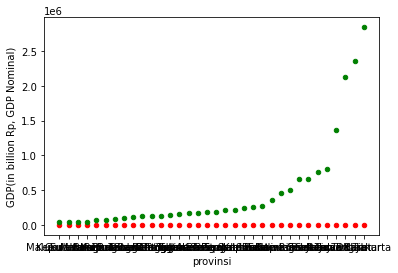

In [50]:
#Membuat tabel scatter plot untuk memvisualisasikan hasil dari pengolahan data
ax1 = sorted_GRIP.plot(kind='scatter', x='provinsi', y='indeks', color='r')    
ax2 = sorted_GRIP.plot(kind='scatter', x='provinsi', y='GDP(in billion Rp, GDP Nominal)', color='g', ax=ax1)    

print(ax1 == ax2)

Karena range kedua kolom berbeda jauh, maka tidak terlalu terlihat insight yang ingin disampaikan, bahwa IPM dan GRP berkorelasi, namun tidak terlalu kuat. Karena itu, dibuatlah scatter plot dengan sedikit modifikasi.

AxesSubplot(0.125,0.125;0.62x0.755)


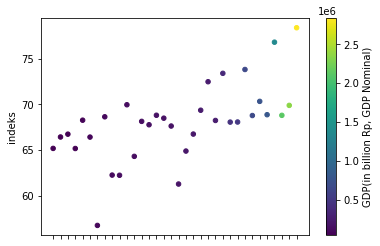

In [51]:
#Membuat scatter plot dengan sedikit perubahan untuk menyesuaikan range data yang berbeda jauh
ax3 = sorted_GRIP.plot.scatter(x='provinsi',y='indeks',c='GDP(in billion Rp, GDP Nominal)',colormap='viridis')
print(ax3)

#### Dari plot di atas, dapat terlihat mengapa nilai korelasi hanya berada pada kisaran ~0,5; masih jauh dari 1 yang menandakan korelasi yang sangat kuat. Ada provinsi yang memiliki GRP pada range 1,5-2,5; namun IPM nya berada di bawah provinsi dengan GRP di bawahnya. Hal ini wajar karena IPM memang dihitung dari beberapa indikator. GRP hanya menjadi salah satu faktornya.  

#### Dapat dilihat juga bahwa jarak dari provinsi dengan GRP tertinggi ke terendah sangatlah jauh. Ketimpangan akut seperti ini menjadi PR besar bagi pemerintah.

# Terima kasih